In [ ]:
'''
案例二主要是基于“蒙特卡罗思想”，求解排队等待时间问题

场景：厕所排队问题
1、两场电影结束时间相隔较长，互不影响；
2、每场电影结束之后会有20个人想上厕所；
3、这20个人会在0到10分钟之内全部到达厕所）；
4、每个人上厕所时间在1-3分钟之间
首先模拟最简单的情况，也就是厕所只有一个位置，不考虑两人共用的情况则每人必须等上一人出恭完毕方可进行。
分析：对于每个人都有如下几个参数：
到达时间 / 等待时间 / 开始上厕所时间 / 结束时间

课程技术点：
随机数 / 循环语句

参考文章：
《我们进行了1亿次婚恋配对实验，然后...》，链接：http://mp.weixin.qq.com/s/Bu3g6sgoKEGq9M24UWDrmg

加油！
'''

In [ ]:
'''
Part1  设置随机值
'''

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

arrivingtime = np.random.uniform(0,10,size = 20)
arrivingtime.sort()
workingtime = np.random.uniform(1,3,size = 20)
# np.random.uniform 随机数：均匀分布的样本值

startingtime = [0 for i in range(20)]
finishtime = [0 for i in range(20)]
waitingtime = [0 for i in range(20)]
emptytime = [0 for i in range(20)]
# 开始时间都是0

print('arrivingtime\n',arrivingtime,'\n')
print('workingtime\n',workingtime,'\n')
print('startingtime\n',startingtime,'\n')
print('finishtime\n',finishtime,'\n')
print('waitingtime\n',waitingtime,'\n')
print('emptytime\n',emptytime,'\n')

arrivingtime
 [ 0.02182042  0.20557235  1.4890603   1.82206756  2.49351946  2.72185662
  2.79508884  3.47367367  4.3050724   4.88277318  4.88638424  5.72248114
  5.89960757  6.18183716  6.38506823  7.40381205  8.32842688  8.70651056
  9.03898246  9.20181958] 

workingtime
 [ 1.43167253  2.22863088  1.21889276  1.77758292  1.88324927  1.40308018
  1.73317337  1.66469021  2.5705339   2.94485254  1.11974085  1.13931405
  2.70679417  2.93840024  1.97025234  1.17749522  1.59849743  2.46753489
  1.7586066   1.10723714] 

startingtime
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

finishtime
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

waitingtime
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

emptytime
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 



In [ ]:
'''
Part2  第一人上厕所时间
'''

In [7]:
startingtime[0] = arrivingtime[0]
# 第一个人之前没有人，所以开始时间 = 到达时间

finishtime[0] = startingtime[0] + working[0]
# 第一个人完成时间 = 开始时间 + “工作”时间

waitingtime[0] = startingtime[0]-arrivingtime[0]
# 第一个人不用等待

In [ ]:
'''
Part3  第二人之后
'''

第1个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 0.205572348722 0.205572348722 1.78075595364 1.98632830237 0.0 

第2个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 1.48906030249 1.98632830237 1.74327861112 3.72960691349 0.497267999872 

第3个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 1.82206756418 3.72960691349 1.46008654591 5.1896934594 1.90753934931 

第4个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.49351945639 5.1896934594 2.97902615051 8.16871960991 2.696174003 

第5个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.72185661595 8.16871960991 2.96021245557 11.1289320655 5.44686299396 

第6个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 2.79508884341 11.1289320655 1.09699533146 12.2259273969 8.33384322207 

第7个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 3.47367366953 12.2259273969 2.02777039352 14.2536977905 8.75225372741 

第8个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.30507240468 14.2536977905 1.05843609023 15.3121338807 9.94862538578 

第9个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.88277318194 15.3121338807 1.42482564237 16.7369595231 10.4293606988 

第10个人：到达时间 开始时间 “工作”时间 完成时间 等待时间
 4.88638423667 16.7369595231 1.28

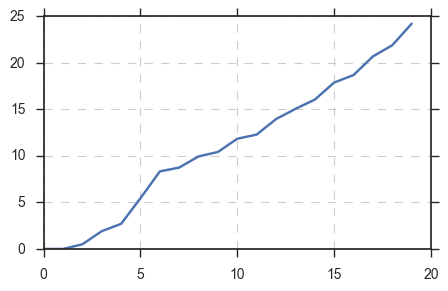

In [24]:
for i in range(1,len(arrivingtime)):
    if finishtime[i-1] > arrivingtime[i]:
        startingtime[i] = finishtime[i-1]
    else:
        startingtime[i] = arrivingtime[i]
        emptytime[i] = arrivingtime[i] - finishtime[i-1]
    # 判断：如果下一个人在上一个人完成之前到达，则 开始时间 = 上一个人完成时间，
    # 否则 开始时间 = 到达时间，且存在空闲时间 = 到达时间 - 上一个人完成时间
    finishtime[i] = startingtime[i] + working[i]
    waitingtime[i] = startingtime[i] - arrivingtime[i]
    print('第%d个人：到达时间 开始时间 “工作”时间 完成时间 等待时间\n' %i,
          arrivingtime[i],
          startingtime[i],
          working[i],
          finishtime[i],
          waitingtime[i],
         '\n')

print('arerage waiting time is %f' %np.mean(waitingtime))

sns.set(style = 'ticks')
fig = plt.figure(figsize = (5,3))
plt.plot(waitingtime)
plt.grid(True,linestyle='--', linewidth = '0.8')
plt.show()
